In [ ]:
# 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
%config InlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정
!apt install fonts-nanum # 나눔 폰트 설치
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumMyeongjo')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,215 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 형태소 분석기 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
# 경로 변경
!cd /content/gdrive/MyDrive/AI service/pytest

/bin/bash: line 0: cd: too many arguments


In [ ]:
# 데이터 로딩
def read_data(filename, encoding='cp949'): # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:] # txt 파일의 헤더(id document label)는 제외하기
    return data

def write_data(data, filename, encoding='cp949'): # 쓰기 함수도 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = read_data('/content/gdrive/MyDrive/AI service/pytest/ratings_small.txt' , encoding='cp949') # 전체파일은 ratings.txt

**※ 한글 인코딩**
- euc-kr (메모장에서는 ANSI로 표현)
- cp949 (=MS949, euc-kr의 확장판)
- utf-8
<br><br>

**※ 파일의 인코딩은 메모장 또는, 아래의 코드로 확인할 수 있다**

import chardet

f = open("C:/pytest/ratings_small.txt", "rb").read()

encoding = chardet.detect(f)

print(encoding)

In [ ]:
# 데이터 확인
print(len(data)) # 500개 데이터
print(len(data[0])) # 3개의 칼럼
print(data[0])
print(data[0:3])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]


탭으로 분리된 요소가 한 리스트의 원소가 되고,
각 문장은 하나의 리스트로서
전체가 다시 리스트로 묶인 중첩리스트이다.


In [ ]:
# 형태소 분석 (샘플 데이터)
import rhinoMorph
rn = rhinoMorph.startRhino()

# 형태소 분석된 문장 샘플 보기. eomi=True 옵션 사용
sample_data = rhinoMorph.onlyMorph_list(
rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('sample data:', sample_data) # 형태소 분석 결과
print('joined sample data:', ' '.join(sample_data)) # 문자열을 공백으로 연결한다

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


한국어 문장이 영어 문장과 유사한 형태로 바뀜. (띄어쓰기 기준으로 단어 구분 가능)

In [26]:
# 형태소 분석 (전체 데이터)
morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(
      rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi= True)
  joined_data_each = ' '.join(morphed_data_each) # 문자열을 하나로 연결
  if joined_data_each: # 내용이 있는 경우만 저장하게 함
    morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"

# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

In [27]:
# 분석된 데이터 로딩
data = read_data('ratings_morphed.txt', encoding='cp949')
print(len(data)) # 492 (일부는 내용이 남지 않아 제외 됨)
print(len(data[0])) # 3개의 원소(컬럼)

data_text = [line[1] for line in data] # 데이터 본문
data_senti = [line[2] for line in data] # 데이터 긍부정 부분 (1은 긍정, 0은 부정)

491
3


In [ ]:
# Counter (예제)
from collections import Counter
count = Counter(["여름", "과일", "딸기", "과일", "딸기"]) # Counter는 리스트의 구성요소를 종류별로 빈도 계산한다. 확인해보자
result = count.most_common(2)

print(result)
print(result[0]) # 0 번째 요소
print(result[0][0]) # 0 번째 요소의 0 번째
print(result[0][1]) # 0 번째 요소의 1 번째

[('과일', 2), ('딸기', 2)]
('과일', 2)
과일
2


In [ ]:
# 분석된 데이터 빈도 구하기 (1)
data_text_freq = Counter(data_text) # 안 좋은 방법. 한 문장 단위로 나뉜 리스트를 바로 처리 시도
print('data_text:', data_text_freq) # 데이터를 바로 카운트하면 각 줄이 하나의 종류로 카운트된다

data_text: Counter({'굿': 3, '재미있다': 2, '최고': 2, '보다': 2, '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사': 1, '폴리스스토리 시리즈 뉴 없다 최고': 1, '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화': 1, '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화': 1, '사랑 해보다 사람 처음 끝 웃다 있다 영화': 1, '완전 감동 다시다 감동': 1, '개들 전쟁 나오다 나오다 1빠 보다': 1, '바보 병': 1, '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다': 1, '고질라 무 귀엽다 ㅋㅋ': 1, '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다': 1, '반전 좋다 ^^': 1, '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다': 1, '네고시에이터 소재 같다 아무런 관련 없다': 1, '단연 최고': 1, '가다 갈수록 더욱 빠지다 밀회 화이팅': 1, '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품': 1, '오랜만 보다 제대로 되다 범죄 스릴러': 1, '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태': 1, '마지막 씬 잊다 없다': 1, '강압적 용서 세뇌 용서 대하다 비판': 1, '중세 시대 명작 굿 평점 왜 이러하다': 1, '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작': 1, '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다': 1, '인간 잠재 되다 악마 여러 시간 공간 속 

In [ ]:
# 분석된 데이터 빈도 구하기 (2)
mergedText = ' '.join(data_text) # 좋은 방법. 공백을 추가하며 일단 모든 리스트 요소들을 결합한다
print('mergedText:', mergedText)
mergedTextList = mergedText.split(' ') # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다
print('mergedTextList:', mergedTextList)
wordInfo = Counter(mergedTextList) # 하나의 리스트로 묶인 분리된 요소들을 카운트한다 (내림차순)
print('wordInfo:', wordInfo)

mergedText: 디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사 폴리스스토리 시리즈 뉴 없다 최고 와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화 안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화 사랑 해보다 사람 처음 끝 웃다 있다 영화 완전 감동 다시다 감동 개들 전쟁 나오다 나오다 1빠 보다 굿 바보 병 나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다 재미있다 고질라 무 귀엽다 ㅋㅋ 영화 오페라 작품 극단적 평 갈리다 어쩌다 없다 반전 좋다 ^^ 평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다 네고시에이터 소재 같다 아무런 관련 없다 단연 최고 가다 갈수록 더욱 빠지다 밀회 화이팅 어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품 오랜만 보다 제대로 되다 범죄 스릴러 그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태 마지막 씬 잊다 없다 강압적 용서 세뇌 용서 대하다 비판 중세 시대 명작 굿 평점 왜 이러하다 시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작 사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다 인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현 최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다 실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화 존 그라다 샴 작품 한 보다 가치 있다 농아 인문 대하다 알다 때 재미있다 ㅋㅋ 이정재 이범수 ㅋㅋ ㅋㅋ 친구 우정 매우 감동적 굿 굿 굿 또 해라 또 하다 제발 ㅠㅠ 아 재미있다 이 

빈도를 다 구했으니 이제 그래프로 보기 좋게 표현한다.

In [ ]:
# sorted (예제)
sample = {'여름':1, '과일':2, '딸기':3}

print(sorted(sample))
print(sorted(sample, reverse=True)) # 역순으로 정렬
print(sorted(sample, key=sample.get, reverse=True)) # sample.get의 출력된 값을 기준으로 sample을 정렬

print(sorted(sample.values(), reverse=True)) # 값 부분만 출력하여 정렬

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


**※ sorted 함수 VS 변수.sort()**

sorted 함수는 새로운 리스트 결과를 만들어내나,
sort 함수는 원 데이터를 변경한다. 사용법도 다르다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_

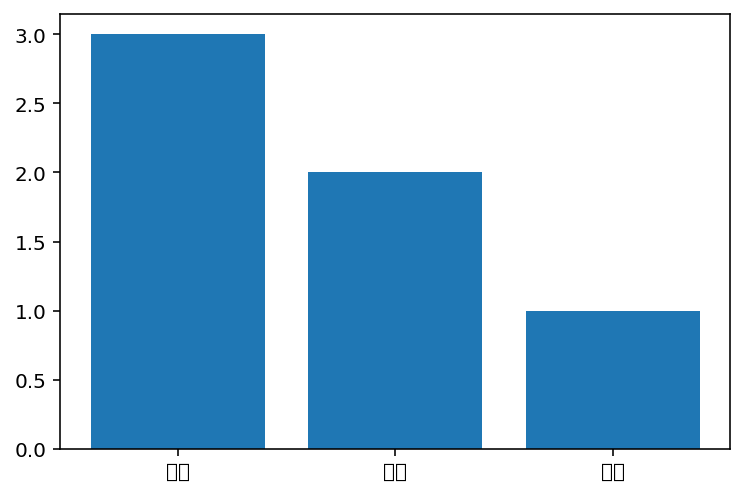

In [ ]:
# bar 그래프 (예제)
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo_sample)), sorted_values_sample) # X축의 위치, 각 x의 높이
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample) # X축의 위치, 각 x의 라벨
plt.show()

현재 한국어 인식이 안됀다. (해결 예정)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50630 missing from current font.
  font.set_

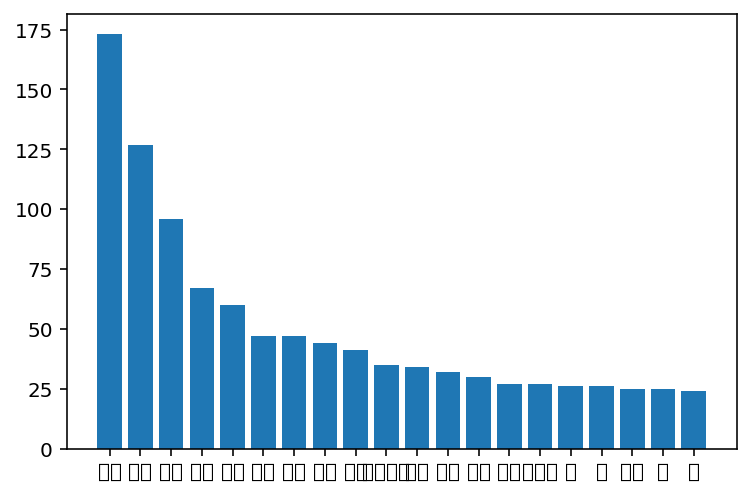

In [ ]:
# 앞에서 20개까지만 출력
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)
import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50630 missing from current font.
  font.set_

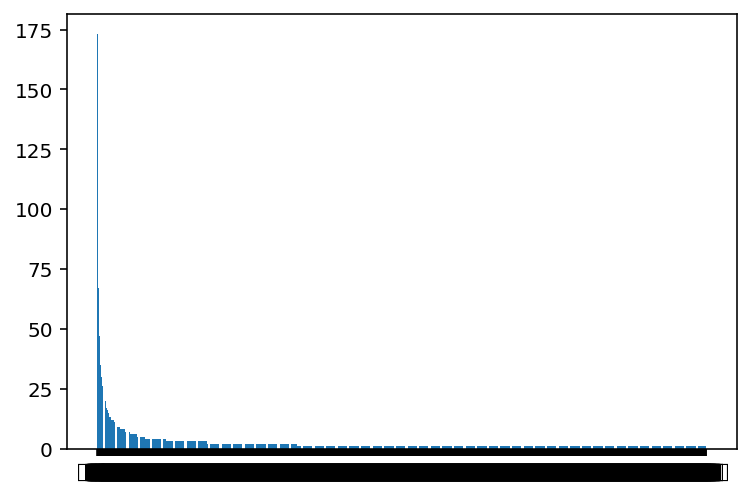

In [ ]:
# 전체 그래프 출력 (양이 많아 시간 다소 소요)
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)
import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo)), sorted_values)
plt.xticks(range(len(wordInfo)), sorted_keys)
plt.show()

- data_text는 각 문장을 리스트 원소로 담고 있다
- 각 문장 리스트 원소는 공백으로 분리되어 있다. 각 문장을 " ".join으로 연결한다

In [ ]:
print(data_text)

['디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사', '폴리스스토리 시리즈 뉴 없다 최고', '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화', '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화', '사랑 해보다 사람 처음 끝 웃다 있다 영화', '완전 감동 다시다 감동', '개들 전쟁 나오다 나오다 1빠 보다', '굿', '바보 병', '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다', '재미있다', '고질라 무 귀엽다 ㅋㅋ', '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다', '반전 좋다 ^^', '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다', '네고시에이터 소재 같다 아무런 관련 없다', '단연 최고', '가다 갈수록 더욱 빠지다 밀회 화이팅', '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품', '오랜만 보다 제대로 되다 범죄 스릴러', '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태', '마지막 씬 잊다 없다', '강압적 용서 세뇌 용서 대하다 비판', '중세 시대 명작 굿 평점 왜 이러하다', '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작', '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다', '인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현', '최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다', '실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화', '존 그라다 샴 작품 한 보다 가치 있다', '농

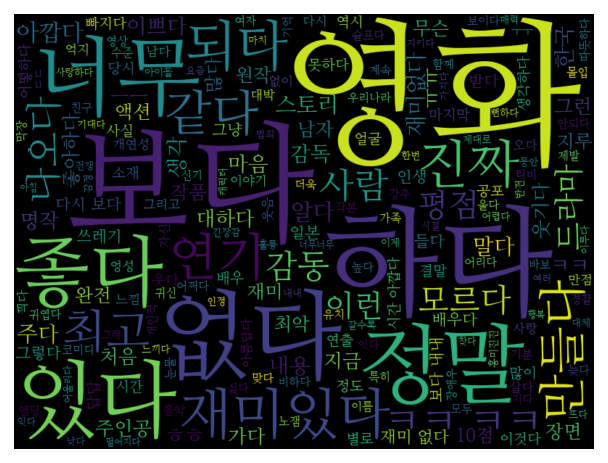

In [ ]:
# word cloud

!pip install wordcloud # 워드클라우드 패키지 설치

from wordcloud import WordCloud
cloud = WordCloud(font_path=fontpath, width=800, height=600).generate(" ".join(data_text))
plt.imshow(cloud, interpolation='bilinear') # 글자를 더 부드럽게 나오게 한다
plt.axis('off') # 축의 위치 정보 off
plt.show()